<h1 style="text-align: center;">Predicting Student Academic Success and Dropout using Random Forest, LightGBM, XGBoost and Voting Ensemble</h1>

<p style="text-align: justify;">
<i>This notebook presents a comprehensive study that investigates the implementation of diverse machine learning algorithms to predict student outcomes, with a particular emphasis on dropout and graduation scenarios. The study evaluates the efficacy of prominent algorithms, namely Random Forest (RF), XGBoost, LightGBM, and Voting Classifier, in effectively addressing the classification task.
<br><br>
Analysing the obtained results, the notebook offers valuable insights into strategies aimed at mitigating student dropout challenges and improving overall academic outcomes. 
</i>
</p>

<h1 style="text-align: center;">Table of Contents</h1>


<ol>
  <li>Data 📊</li>
  <li>Data Preprocessing ⚙️</li>
  <li>Class Balancing ⚖️
    <ul>
      <li>RandomOverSampler</li>
      <li>RandomUnderSampler</li>
      <li>SMOTE over sampler</li>
    </ul>
  </li>
  <li>Feature selection ✅</li>
  <li>Modeling 🧩
    <ul>
      <li>Random Forest Classifier</li>
      <li>Extreme Gradient Boost Classifier</li>
      <li>Light Gradient Boost Classifier</li>
    </ul>
  </li>
  <li>Hyper-parameter Tuning using GridSearchCV 🔧
    <ul>
      <li>Random Forest GridSearchCV</li>
      <li>XGBoost GridsearchCV</li>
      <li>LightGBM GridsearchCV</li>
    </ul>
  </li>
  <li>Voting Ensemble 🙌</li>
  <li>Model Selection 🏆</li>
  <li>Conclusion 💎</li>
    <li>Future Research 🚀</li>
</ol>


Import Required Libraries

In [1]:
# Data processing and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Model Evaluation
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.pipeline import make_pipeline

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ensemble Classifier
from sklearn.ensemble import RandomForestClassifier

# Boosting Classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Voting Ensemble
from sklearn.ensemble import VotingClassifier

# Libraries for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Libraries to handle Class Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To keep time
from datetime import datetime

# To filter Warnings
import warnings
warnings.filterwarnings('ignore')

To check the time to run the notebook.

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable



<b>Machine Setting </b><br> <br>
MacBook Pro 2017 <br>
Processor: 2.3 GHz Dual-Core Intel Core i5 <br>
Graphics: Intel Iris Plus Graphics 640 1536 MB <br>
Memory: 8 GB 2133 MHz LPDDR3 <br>
OS: macOS Ventura 13.2 <br>
<br>
It takes around 69 minutes to run the whole notebook. <br>

# 1. Data 📊

The dataset for this notebook is taken from <a href="https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success">UCI Machine Learning Repository.</a>

Read the data.

In [3]:
data = pd.read_csv("data.csv", delimiter=';')

Check the total number of rows and columns.

In [4]:
data.shape

(4424, 37)

There are 4424 records and 37 features.

Check the data head.

In [5]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Check the column names and the datatype.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Notice that most of the variables are categorical but are integer encoded thus having integer as the datatype.

The last column 'Target' is our response variable.

There is no missing value.

Now, check the total number of each class in target variable.

In [7]:
data.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Visualize to see

<AxesSubplot:xlabel='Target', ylabel='count'>

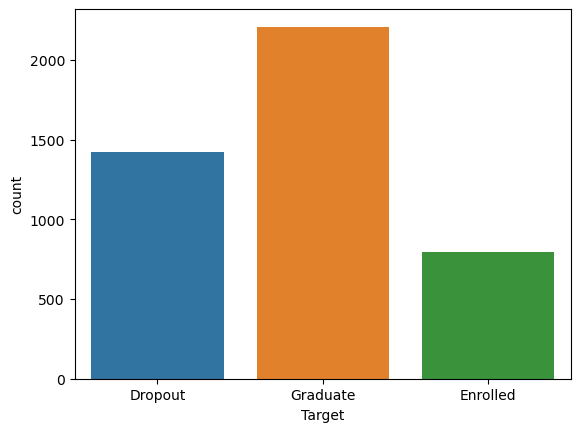

In [8]:
sns.countplot("Target",data=data)

The target variable has class imbalance. 

# 2. Data Preprocessing ⚙️

Since we want to predict if the student Graduates or Drops out, we are not intersted in the Enrolled students. 

In [9]:
# remove enrolled from the data
data = data[data.Target != 'Enrolled']

In [10]:
data.shape

(3630, 37)

The number of records decreased to 3630. <br>
Removed 794 'Enrolled' students from 4424 total students.

Check the number of students in each class & Visualize

In [11]:
data.Target.value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

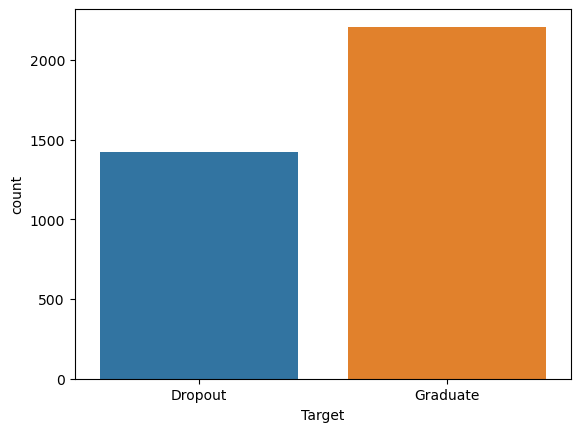

In [12]:
sns.countplot("Target",data=data)

Let's encode the Target variable. <br>
• Graduate: 0 <br>
• Dropout: 1

In [13]:
data.Target = data.Target.map({
    'Graduate': 0,
    'Dropout': 1
})

Divide the data into input(X) and target(y).

In [14]:
X = data.drop('Target', axis = 1)
y = data.Target

In [15]:
X.shape, y.shape

((3630, 36), (3630,))

Divide the data into Train and Test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# just checking
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((2904, 36), (726, 36), (2904,), (726,))

We have 2904 training data and 726 testing data.

### Important Function for CV 📢

Before we begin to model, let's make a function that will give us a nice and pretty looking output for the estimators. <br>
The function does the cross validation and returns the mean value of cross validation for each parameter as a dataframe.

In [18]:
def model_tester(model_dict, X, y, cv=5):
    """
    Cross Validation for Models in Model Dict...
    Providing Mean value of cross validation for each Parameter
    
    Parameter Includes : accuracy, precision, recall, f1_micro, f1_macro
    
    model_dict : Model Dictionery with/without parameter tuning
    X : Feature Data
    y : Target Data
    cv : Cross Validation folds (Default = 5)
    """
    
    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]
    
    cv_score = {} # To append Scores of each Model
    
    np.random.seed(42)
    for name, model in model_dict.items():
        # enumerating through All Models in Dictionery
        cv_score[name] = {}
        for param in scoring_param:
            # Calculating Mean values for cross validation with each Parameter
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score 
    cv = pd.DataFrame(data=cv_score)
    return cv

###### Models using unbalanced dataset and default parameters

In [19]:
model_dict = {"Random Forest Classifier" : RandomForestClassifier(),
              "XGBoost" : XGBClassifier(),
              "LightGBM" : LGBMClassifier()}

model_tester(model_dict, X, y, cv=10)


,Random Forest Classifier,XGBoost,LightGBM
accuracy,0.907163,0.907438,0.907438
precision,0.931789,0.923064,0.918360
recall,0.823372,0.833222,0.838151
f1_micro,0.906336,0.907438,0.907438
f1_macro,0.899157,0.900980,0.901176


# 3. Class Balancing ⚖️

In [20]:
# RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


Let's apply different machine learning algorithms to the balanced data and see which works better.

###### 3.1. RandomOverSampler

In [21]:
# Models using RandomOverSampler

model_dict = {"Random Forest Classifier" : RandomForestClassifier(),
              "XGBoost" : XGBClassifier(),
              "LightGBM" : LGBMClassifier()}

model_tester(model_dict, X_ros, y_ros, cv=10)


,Random Forest Classifier,XGBoost,LightGBM
accuracy,0.947048,0.948406,0.939576
precision,0.952834,0.950388,0.942124
recall,0.946606,0.946154,0.936645
f1_micro,0.950215,0.948406,0.939576
f1_macro,0.947479,0.948390,0.939560


###### 3.2. RandomUnderSampler

In [22]:
# Models using RandomUnderSampler

model_dict = {"Random Forest Classifier" : RandomForestClassifier(),
              "XGBoost" : XGBClassifier(),
              "LightGBM" : LGBMClassifier()}

model_tester(model_dict, X_rus, y_rus, cv=10)


,Random Forest Classifier,XGBoost,LightGBM
accuracy,0.893031,0.893033,0.894790
precision,0.920988,0.920626,0.921405
recall,0.868399,0.860642,0.863454
f1_micro,0.897256,0.893033,0.894790
f1_macro,0.892871,0.892886,0.894665


###### 3.3. SMOTE over sampler

In [23]:
# Models using SMOTE

model_dict = {"Random Forest Classifier" : RandomForestClassifier(),
              "XGBoost" : XGBClassifier(),
              "LightGBM" : LGBMClassifier()}

model_tester(model_dict, X_smote, y_smote, cv=10)


,Random Forest Classifier,XGBoost,LightGBM
accuracy,0.920792,0.922381,0.923740
precision,0.946399,0.944092,0.946262
recall,0.885041,0.897719,0.898172
f1_micro,0.920566,0.922381,0.923740
f1_macro,0.919738,0.922251,0.923623


Comment: <br>
    Notice that all the estimators with unbalanced dataset give around 90% accuracy.<br>
    RandomOverSampler performed the best, giving around 94% accuracy. <br>
    RandomUnderSampler give 89% accuracy. <br>
    SMOTE over sampler give 92% accuracy for all three estimators

Therefore, for the rest of the modeling, RandomOverSampler is used.

Create a new dataframe df and insert values from X_ros and y_ros.

In [24]:
df = X_ros

In [25]:
df['Target'] = y_ros

In [26]:
df.Target.value_counts()

1    2209
0    2209
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

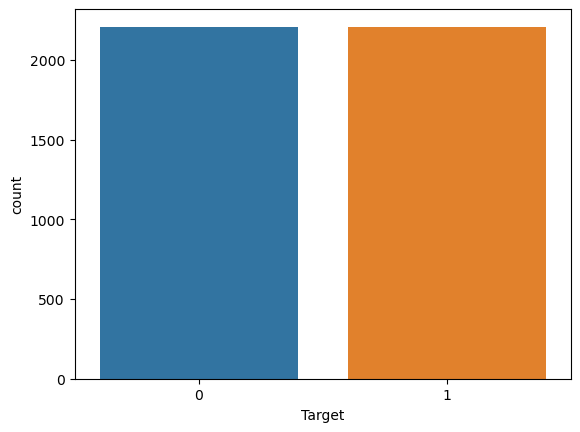

In [27]:
sns.countplot("Target",data=df)

Now, we have balanced data.

# 4. Feature selection ✅ 

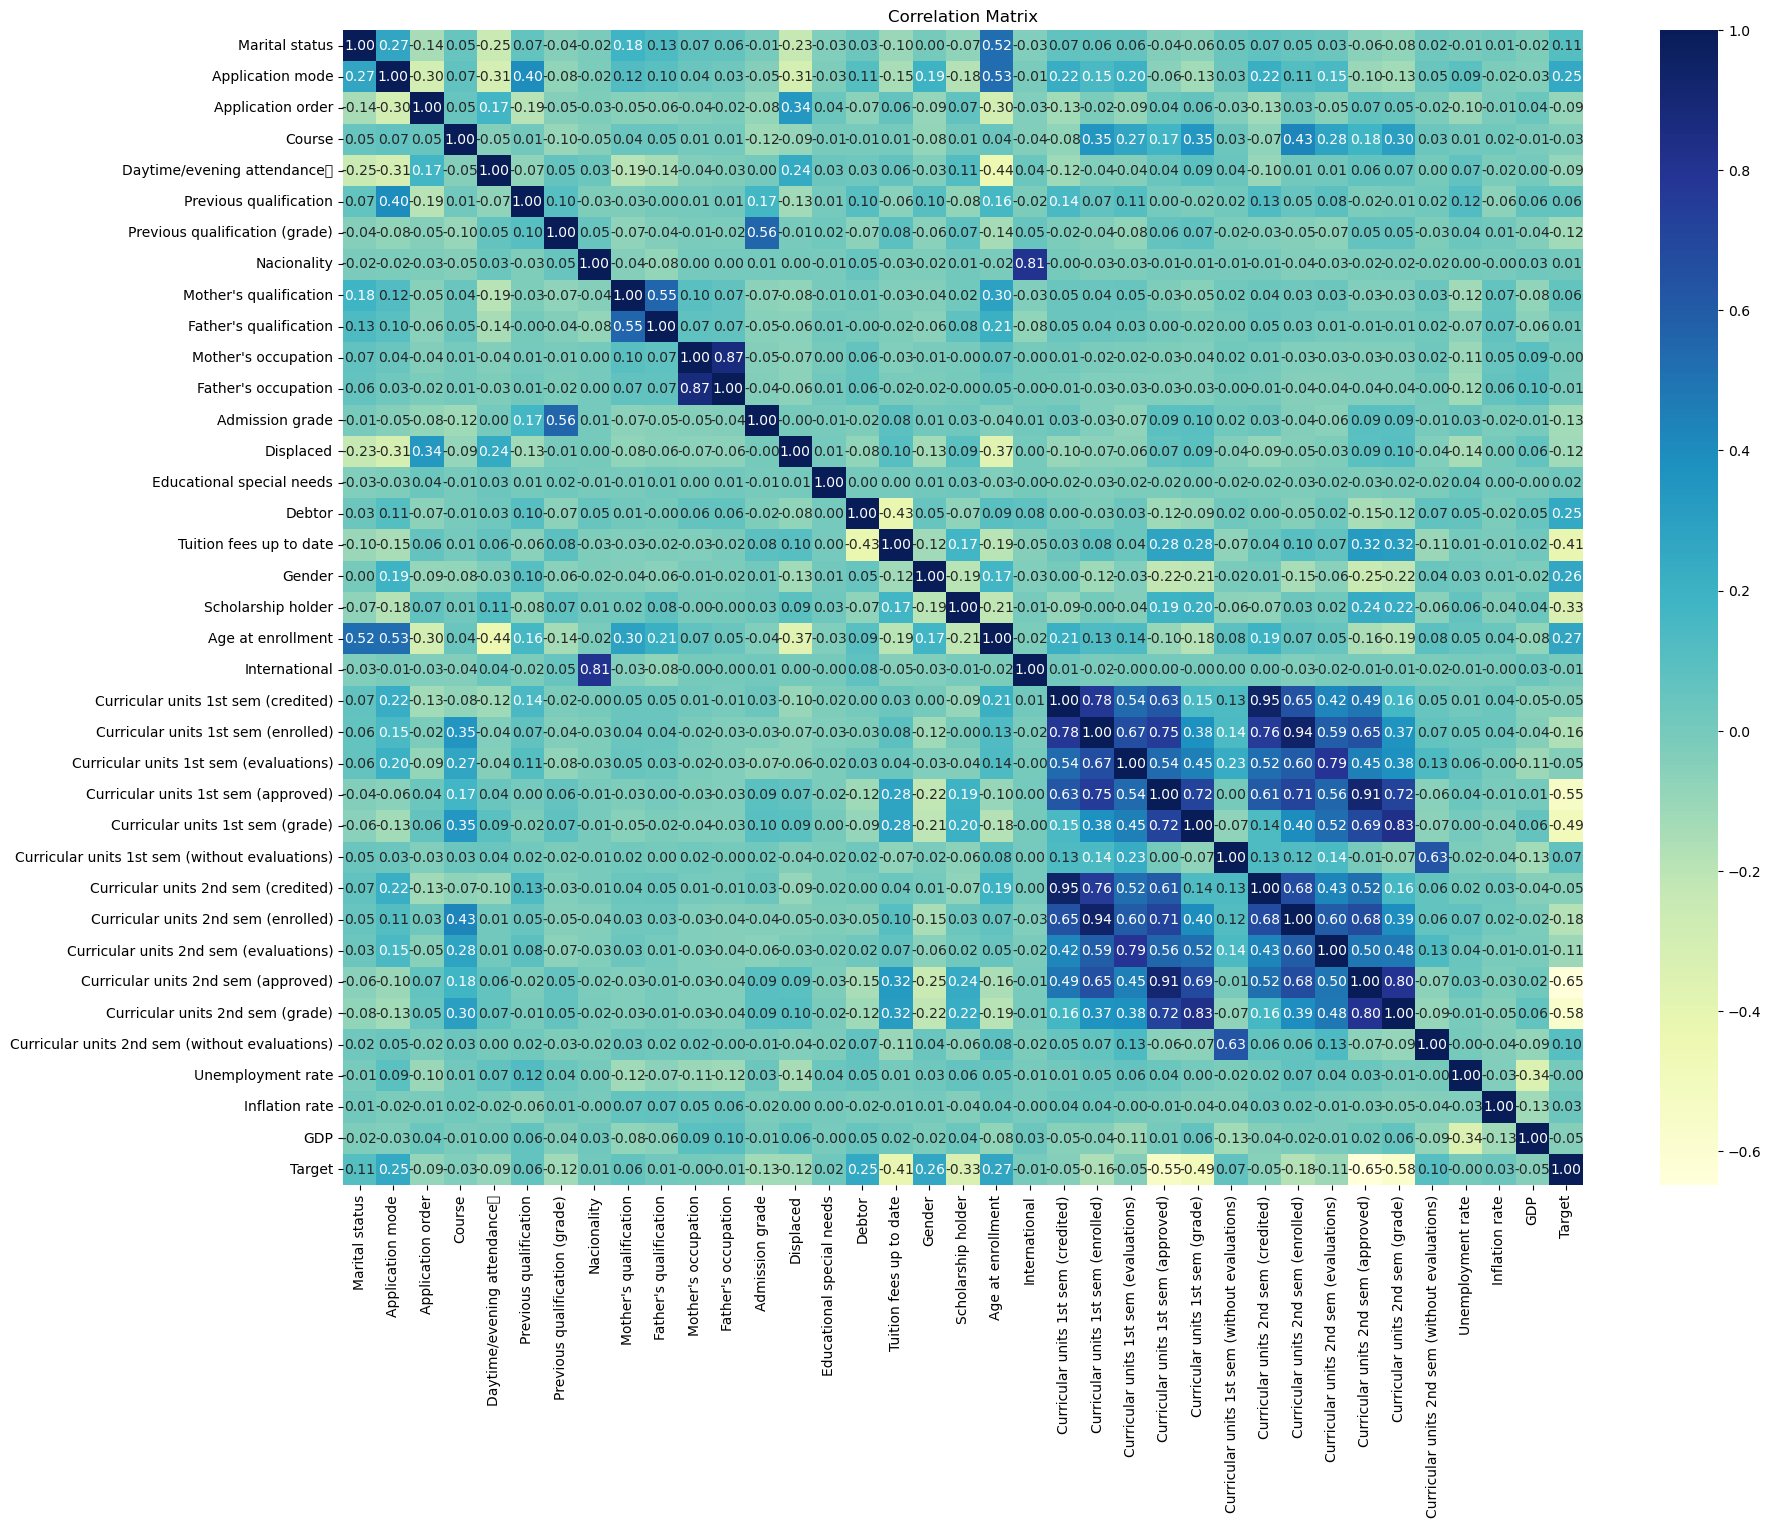

In [28]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

By looking at the heatmap above, consider threshold of 0.7 to select features that exhibit a strong correlation. Any pair of features with a correlation coefficient exceeding this threshold are considered highly correlated. <br>
<br>
To perform feature selection, we identify one feature from each highly correlated pair to retain in the dataset, while discarding the other. 

Comment: <br>
International and Nationality are correlated.<br>
Parent's Occupation is correlated with each other, with correlation value of 0.87. But this is important so we are keeping the both.<br>
<br>
Other: <br>
'Curricular units 1st sem (credited)', <br>
'Curricular units 1st sem (enrolled)', <br>
'Curricular units 1st sem (evaluations)', <br>
'Curricular units 1st sem (approved)', <br>
'Curricular units 1st sem (grade)', <br>

These are highly correlated with 2nd semester data. <br>

Removing Sem 1 data as sem 2 data is more correlated with our Target Label. <br>

Curricular units 2nd sem (approved) and Curricular units 2nd sem (grade) are also correlated, but we are not removing at this time.

Limitation of the correlation is that it only captures the linear relation.

Therefore the following features can be dropped.

In [29]:
features_to_remove = ['Nacionality', 'Curricular units 1st sem (credited)',
'Curricular units 1st sem (enrolled)',
'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)']

Drop the features.

In [30]:
df.drop(features_to_remove, axis = 1, inplace = True)

Divide the data into input(X) and target(y).

In [31]:
X = df.drop('Target', axis = 1)
y = df.Target

 Divide the data into Train and Test.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###### Models using balanced dataset, selected features and default parameters

In [33]:
# after balance class and feature selection
model_dict = {"Random Forest Classifier" : RandomForestClassifier(),
              "XGBoost" : XGBClassifier(),
              "LightGBM" : LGBMClassifier()}

model_tester(model_dict, X, y, cv=10)


,Random Forest Classifier,XGBoost,LightGBM
accuracy,0.945237,0.945236,0.933917
precision,0.946421,0.942630,0.939657
recall,0.940724,0.948416,0.927587
f1_micro,0.945690,0.945236,0.933917
f1_macro,0.943406,0.945216,0.933892


Since we are getting approximately the same result, feature selection does not have a significant effect on accuracy. <br>
We can confirm that we have done the right feature selection and no information is lost during the feature removal.

# 5. Modeling 🧩

Compare different classification algorithms.

In [34]:
model_dict = {"Logistic Regression" : LogisticRegression(),
              "KNeighborsClassifier" : KNeighborsClassifier(),
              "DecisionTreeClassifier" : DecisionTreeClassifier(),
              "Support Vector Classifier" : SVC(),
              "Random Forest Classifier" : RandomForestClassifier(),
              "XGBoost" : XGBClassifier(),
              "LightGBM" : LGBMClassifier()}

model_tester(model_dict, X, y, cv = 10)

,Logistic Regression,KNeighborsClassifier,DecisionTreeClassifier,Support Vector Classifier,Random Forest Classifier,XGBoost,LightGBM
accuracy,0.834082,0.759637,0.905853,0.508148,0.944785,0.945236,0.933917
precision,0.867041,0.767310,0.878712,0.593991,0.949902,0.942630,0.939657
recall,0.790391,0.745169,0.938009,0.060204,0.942534,0.948416,0.927587
f1_micro,0.834082,0.759637,0.898163,0.508148,0.945690,0.945236,0.933917
f1_macro,0.833700,0.759468,0.902085,0.384592,0.943174,0.945216,0.933892


###### 5.1. Random Forest Classifier

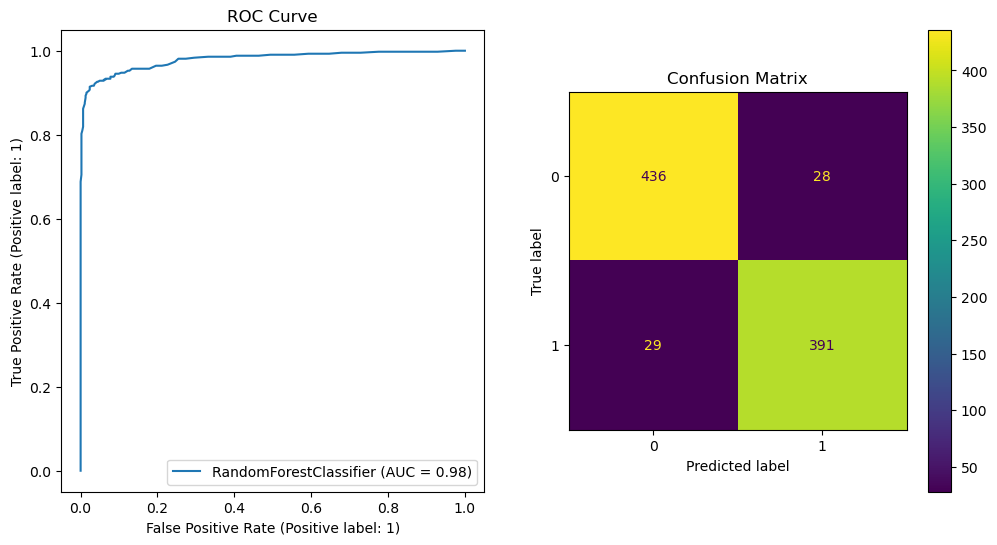

,Random Forest Classifier
accuracy,0.945237
f1_macro,0.943406
f1_micro,0.945690
precision,0.946421
recall,0.940724


In [35]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

# plot the ROC Curve and Confusion Matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

roc_display = RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=axs[0])
roc_display.ax_.set_title('ROC Curve')

confusion_display = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=axs[1])
confusion_display.ax_.set_title('Confusion Matrix')

plt.show()

model_tester({'Random Forest Classifier': RandomForestClassifier()}, X, y, cv = 10)

Comment: <br>
<b>AUC = 0.98 </b> <br>
The ROC Curve and Confusion Matrix are generated using single training and testing. <br> 
While the other evaluation metrics are the average score from the Cross Validation using the model tester function.

###### 5.2. Extreme Gradient Boost Classifier

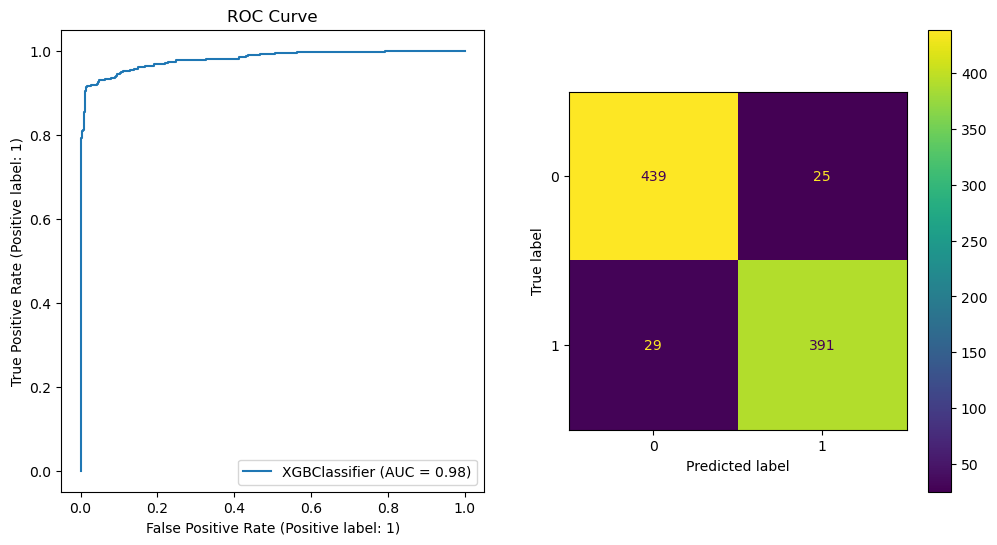

,XGBoost
accuracy,0.945236
f1_macro,0.945216
f1_micro,0.945236
precision,0.942630
recall,0.948416


In [36]:
xgb_model = XGBClassifier().fit(X_train, y_train)

# plot the ROC Curve and Confusion Matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

roc_display = RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=axs[0])
roc_display.ax_.set_title('ROC Curve')

consusion_display = ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, ax=axs[1])
confusion_display.ax_.set_title('Confusion Matrix')

plt.show()

model_tester({'XGBoost': XGBClassifier()}, X, y, cv=10)

Comment: <br>
<b>AUC = 0.98 </b> <br>
The ROC Curve and Confusion Matrix are generated using single training and testing. <br> 
While the other evaluation metrics are the average score from the Cross Validation using the model tester function.

###### 5.3. Light Gradient Boost Classifier

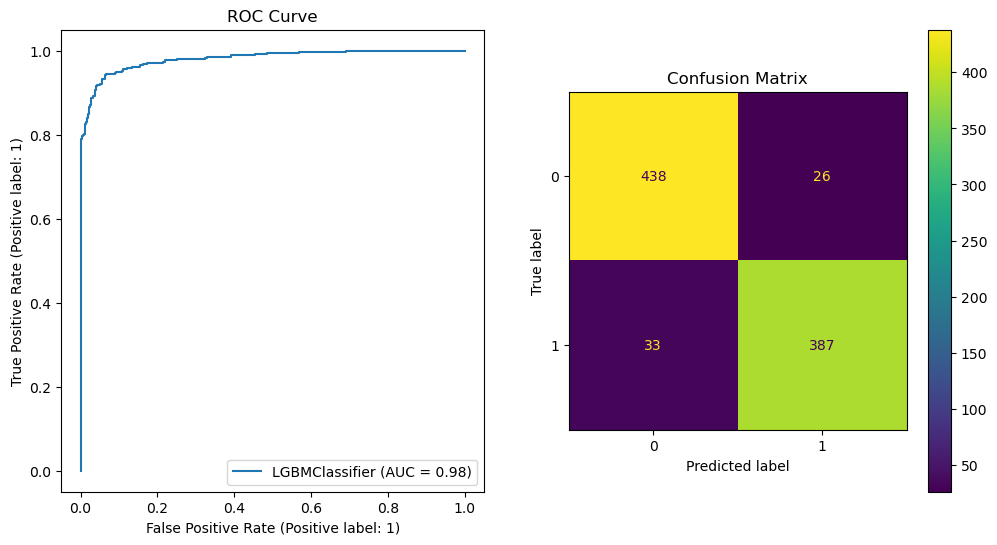

,LightGBM
accuracy,0.933917
f1_macro,0.933892
f1_micro,0.933917
precision,0.939657
recall,0.927587


In [37]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

# plot the ROC Curve and Confusion Matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

roc_display = RocCurveDisplay.from_estimator(lgbm_model, X_test, y_test, ax=axs[0])
roc_display.ax_.set_title('ROC Curve')

confusion_display = ConfusionMatrixDisplay.from_estimator(lgbm_model, X_test, y_test, ax=axs[1])
confusion_display.ax_.set_title('Confusion Matrix')

plt.show()

model_tester({'LightGBM': LGBMClassifier()}, X, y, cv=10)

Comment: <br>
<b>AUC = 0.98 </b> <br>
The ROC Curve and Confusion Matrix are generated using single training and testing. <br> 
While the other evaluation metrics are the average score from the Cross Validation using the model tester function.

### Comparisions 📈

Compare the three models side-by-side.

In [38]:
# after balance class and feature selection
model_dict = {"Random Forest Classifier" : RandomForestClassifier(),
              "XGBoost" : XGBClassifier(),
              "LightGBM" : LGBMClassifier()}

model_tester(model_dict, X, y, cv=10)


,Random Forest Classifier,XGBoost,LightGBM
accuracy,0.945237,0.945236,0.933917
precision,0.946421,0.942630,0.939657
recall,0.940724,0.948416,0.927587
f1_micro,0.945690,0.945236,0.933917
f1_macro,0.943406,0.945216,0.933892


Comment: All the models have comparatively equal scores.

Similarly compare ROC Curve for differemt estimators.

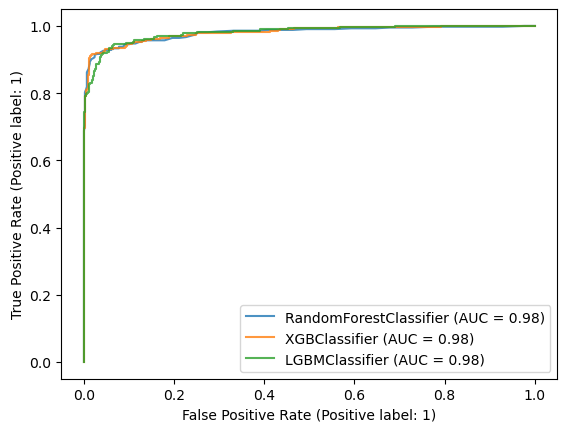

In [39]:
ax = plt.gca()
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=ax, alpha=0.8)
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax, alpha=0.8)
RocCurveDisplay.from_estimator(lgbm_model, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

All the three models have high AUC values (0.98). <br> 
Therefore, this can not be used to evaluate the models.

# 6. Hyper-parameter Tuning using GridSearchCV 🔧

Get the default parameters from the estimator. Then create a parameter grid to pass into the GridSearchCV. <br>
Important: Include all the default values in the grid, so that you do not decrease the scores.

###### 6.1. Random Forest GridSearchCV

In [40]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Tune using GridSearchCV

In [41]:
rf_grid = {'bootstrap': [True, False],
#            'max_depth': [10, 50, 100, None],
#            'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [400, 500, 600]}

rf_model = GridSearchCV(RandomForestClassifier(),
                        param_grid = rf_grid,
                        cv = 5,
                        verbose = 2,
                        n_jobs = -1)

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [400, 500, 600]},
             verbose=2)

Get the best parameters for the model.

In [42]:
rf_model.best_params_

{'bootstrap': False,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

Fit the model using the tuned parameters and compare with the default parameters.

In [43]:
model_dict = {"RF Base Model" : RandomForestClassifier(),
              "RF Tuned Model" : RandomForestClassifier(**rf_model.best_params_)}

model_tester(model_dict, X, y, cv=10)

,RF Base Model,RF Tuned Model
accuracy,0.945237,0.947500
precision,0.946421,0.952771
recall,0.940724,0.940271
f1_micro,0.945690,0.947726
f1_macro,0.943406,0.947020


###### 6.2. XGBoost GridSearchCV

In [44]:
# fit then check the default params
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Tune using GridSearchCV

In [45]:
xgb_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'min_child_weight': [1, 3, 5]
}

xgb_model = GridSearchCV(XGBClassifier(),
                         param_grid = xgb_grid,
                         cv=5,
                         verbose=2,
                         n_jobs = -1)

xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

Get the best parameters for the model.

In [46]:
xgb_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 1000,
 'subsample': 0.8}

Fit the model using the tuned parameters and compare with the default parameters.

In [47]:
model_dict = {"XGB Base Model" : XGBClassifier(),
              "XGB Tuned Model" : XGBClassifier(**xgb_model.best_params_)}

model_tester(model_dict, X, y, cv=10)

[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.7s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.7s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   5.3s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_est

[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.0s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.7s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.6s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.1s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   4.1s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_es

[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.7s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.6s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.7s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.1s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_es

[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.2s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.1s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   5.3s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   5.2s
[CV] END bootstrap=True, min_samples_leaf=1, min_samples_split=10, n_est

,XGB Base Model,XGB Tuned Model
accuracy,0.945236,0.946823
precision,0.942630,0.949047
recall,0.948416,0.944344
f1_micro,0.945236,0.946823
f1_macro,0.945216,0.946807


###### 6.3. LightGBM GridSearchCV

In [48]:
LGBMClassifier().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Tune using GridSearchCV

In [49]:
lgb_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 100, 1000],
#     'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 1, 5],
    'reg_lambda': [0, 1, 5]
}

lgb_model = GridSearchCV(LGBMClassifier(),
                         param_grid = lgb_grid,
                         cv=5,
                         verbose=2,
                         n_jobs = -1)

lgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 100, 1000],
                         'reg_alpha': [0, 1, 5], 'reg_lambda': [0, 1, 5],
                         'subsample': [0.8, 1.0]},
             verbose=2)

Get the best parameters for the model.

In [50]:
lgb_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 5,
 'subsample': 0.8}

Fit the model using the tuned parameters and compare with the default parameters.

In [51]:
model_dict = {"LGB Base Model" : LGBMClassifier(),
              "LGB Tuned Model" : LGBMClassifier(**lgb_model.best_params_)}

model_tester(model_dict, X, y, cv=10)

,LGB Base Model,LGB Tuned Model
accuracy,0.933917,0.940484
precision,0.939657,0.939578
recall,0.927587,0.941625
f1_micro,0.933917,0.940484
f1_macro,0.933892,0.940467


# 7. Voting Ensemble 🙌

Create a voting classifier using Random Forest Classifier, XGBoost Classifier and Light GBM using the best parameters from GridSearchCV.

Compare, Hard vs Soft voting.

In [52]:
# for voting = 'hard'
voting_ensemble_h = VotingClassifier(estimators=[
    ("Random Forest Classifier", RandomForestClassifier(**rf_model.best_params_)),
    ("XGBoost" , XGBClassifier(**xgb_model.best_params_)),
    ("LightGBM" , LGBMClassifier(**lgb_model.best_params_))],
#                                      verbose = True,
                                     voting='hard')

# for voting = 'soft'
voting_ensemble_s = VotingClassifier(estimators=[
    ("Random Forest Classifier", RandomForestClassifier(**rf_model.best_params_)),
    ("XGBoost" , XGBClassifier(**xgb_model.best_params_)),
    ("LightGBM" , LGBMClassifier(**lgb_model.best_params_))],
#                                      verbose = True,
                                     voting='soft')

Compare the score.

In [53]:
model_dict = {
    "Random Forest Classifier": RandomForestClassifier(**rf_model.best_params_),
    "XGBoost" : XGBClassifier(**xgb_model.best_params_),
    "LightGBM" : LGBMClassifier(**lgb_model.best_params_),
    "Hard Voting Ensemble" : voting_ensemble_h,
    "Soft Voting Ensemble" : voting_ensemble_s
    
}

model_tester(model_dict, X, y, cv=10)

[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=1, reg_lamb

[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=1, reg_lamb

[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lamb

,Random Forest Classifier,XGBoost,LightGBM,Hard Voting Ensemble,Soft Voting Ensemble
accuracy,0.948179,0.946823,0.940484,0.946597,0.946597
precision,0.953688,0.949047,0.939578,0.949891,0.948232
recall,0.938914,0.944344,0.941625,0.942986,0.945249
f1_micro,0.947273,0.946823,0.940484,0.945464,0.946596
f1_macro,0.946567,0.946807,0.940467,0.945900,0.946580


# 8. Model Selection 🏆 

Based on the performance metrics, it appears that all the models have similar performance. It is indeed challenging to select a single model. But we are choosing Random Forest Classifier. Its accuracy is the highest among the models. Random Forest Classifier is already an ensemble model. This inherent ensemble nature can help capture complex relationships and patterns in the data.

We are not choosing the voting ensembles as the computational cost of training and making predictions is significantly high.
 
However, it's still advisable to experiment the different models with additional data and perform additional evaluations.


###### Create the best model.

In [54]:
best_model = RandomForestClassifier(**rf_model.best_params_)

# Fit the model with the class balanced and reduced feature set data.
best_model.fit(X, y)


RandomForestClassifier(bootstrap=False, n_estimators=600)

A test data to predict if the student graduates or not.

In [55]:
test_student = np.array([[  2, 13, 5, 171, 1, 1, 122, 19, 12, 5,
                         9, 127.3 , 1, 0, 0, 1, 1, 0,  20, 0,
                         0, 0, 0, 0,0, 0, 0, 10.8, 1.4, 1.74]])

# A student who is married,
# application mode is Transfer

Use the best model to predict the outcome.

In [56]:
y_pred = best_model.predict(test_student)
y_pred

array([1])

Our predictive model indicates with ~94% accuracy that the student is likely to not pass. <br>
<br>
Note: <br>
• Graduate: 0 <br> 
• Dropout: 1

# 9. Conclusion 💎

In conclusion, all the models exhibit similar performance in terms of accuracy, precision and recall. <br>
<br>
The ensemble and boosting methods perform better as compared to other classifiers like Support Vector Machines, Logistic Regression, KNeighborsClassifier, etc.<br>
 <br>
The hyperparameter tuning did not give much improvement. It did a slight enhancement to the models’ accuracy. But increasing the accuracy score even by small amount is regarded very good when the accuracy is above 90%. <br>
<br>
This project highlights the importance of early intervention and providing proper care to support the student's educational journey. By recognizing the potential challenges faced by the student, educational institutions can take proactive measures to address their specific needs and provide the necessary resources and guidance. <br>
<br>
Through early intervention strategies, such as additional tutoring, personalized mentoring, and academic support programs, we can significantly improve the student's chances of success and increase the likelihood of their graduation in the future. 

# 10. Future Research 🚀

If you want to rework/explore this project further, I suggest the following. <br>
<br>
• The categorical features are integer encoded and have integer data type. Try converting the categorical features into category using .astype('category') before applying the machine learning algorithms. <br><br>
• Use other hyperparameter tuning library like Optuna, Hyperopt, etc. which might give you better parameters for the estimators.<br><br>
• Use parallel computing like spark, when tuning the hyperparameter. This will improve the run time and give you better parameters.<br><br>
• As most of our features are categorical, use CatBoost Classifier. It provides a gradient boosting framework typically for Categorical features.

In [57]:
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 1 hours 9 minutes and 4.46 seconds.


<i>Thank you for reading my notebook.</i>
<br>
<i>Avishek K C <br> 2023</i>